## Single Layer Perceptron with Stochastic Gradient Descent

In [23]:
#Reading the data set and taking only 2 classes
import pandas as pd 
import numpy as np

data = pd.read_csv('irisdata.csv',header=None)

data = data[data[4] != 'Iris-versicolor']
data[4] = data[4].str.replace('Iris-setosa','1')
data[4] = data[4].str.replace('Iris-virginica','0')

data = data.astype('float64')

data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0
3,4.6,3.1,1.5,0.2,1.0
4,5.0,3.6,1.4,0.2,1.0


In [24]:
#Initialisations of variables
alpha = 0.8
theta = np.array([0.2,0.3,0.3,0.2])
bias = 0.3

total = 0
d_bias = 0
h = 0
array_dtheta = np.empty(4)
total_error = np.zeros(60)

In [25]:
#Defining functions
import math as mt

def h(x,theta,bias,n):
    return np.dot(x.iloc[n,:4],np.transpose(theta)) + bias

def sigmoid(h):
    return 1/(1+mt.exp(-h))

def error(sigmoid,n):
    return (sigmoid-data.iloc[n,4])**2

def prediction(sigmoid):
    if sigmoid >= 0.5:
        prediction = 1
        return prediction
    else:
        prediction = 0
        return prediction

def d_theta(sigmoid,fact,x_array,i):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid*x_array[i]

def d_bias(sigmoid,fact):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid

def new_theta(theta,alpha,d_theta,i):
    return theta[i]-(alpha*d_theta[i])

def new_bias(bias,alpha,d_bias):
    return bias-(alpha*d_bias)

def to_bias(bias,alpha,d_bias_value):
    bias = new_bias(bias,alpha,d_bias_value)

In [26]:
#Calculation
for n in range(60):
    total = 0
    print('=======================================')
    
    for i in range(100):
        print('Row: ', i)
        print('')
        
        x_array = np.array(data.iloc[i,:4])
        print('x1,x2,x3,x4: ', x_array)
        
        fact = data.iloc[i,4]
        print('fact: ', fact)
        
        print('----------------------')
        
        h_value = h(data,theta,bias,i)
        print('h: ', h_value)
        
        sigmoid_value = sigmoid(h_value)
        print('sigmoid: ', sigmoid_value)
        
        error_value = error(sigmoid_value,i)
        print('error: ', error_value)
        total += error_value
        
        prediction_value = prediction(sigmoid_value)
        print('prediction: ', prediction_value)
                
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
            print('d_theta ',j ,' : ',  array_dtheta[j])

        
        d_bias_value = d_bias(sigmoid_value,fact)
        print('d_bias: ', d_bias_value)
        
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
            print('new_theta ',j ,' : ', theta[j])
        
        to_bias(bias,alpha,d_bias_value)
        
        print('----------------------')
        print('total: ',total)
        print('\n')
        
    total_error[n] = total
    print('=======================================')
    print('total error: ', total_error[n])
    print('\n')
    

 
        

Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  2.83
sigmoid:  0.9442756020713345
error:  0.00310520852451
prediction:  1
d_theta  0  :  -0.0299081610202
d_theta  1  :  -0.0205252085433
d_theta  2  :  -0.00821008341731
d_theta  3  :  -0.00117286905962
d_bias:  -0.00586434529808
new_theta  0  :  0.223926528816
new_theta  1  :  0.316420166835
new_theta  2  :  0.306568066734
new_theta  3  :  0.200938295248
----------------------
total:  0.00310520852451


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
----------------------
h:  2.81588344418
sigmoid:  0.943528124850763
error:  0.00318907268287
prediction:  1
d_theta  0  :  -0.0294880017311
d_theta  1  :  -0.0180538786109
d_theta  2  :  -0.00842514335175
d_theta  3  :  -0.00120359190739
d_bias:  -0.00601795953696
new_theta  0  :  0.247516930201
new_theta  1  :  0.330863269723
new_theta  2  :  0.313308181415
new_theta  3  :  0.201901168774
----------------------
total:  0.00629428120738


Row:  2


d_theta  3  :  -0.000184625309232
d_bias:  -0.000461563273081
new_theta  0  :  0.36689912078
new_theta  1  :  0.412733793632
new_theta  2  :  0.34857101417
new_theta  3  :  0.207195098311
----------------------
total:  0.0223983152591


Row:  27

x1,x2,x3,x4:  [ 5.2  3.5  1.5  0.2]
fact:  1.0
----------------------
h:  4.21673924669
sigmoid:  0.9854676520830895
error:  0.000211189135978
prediction:  1
d_theta  0  :  -0.00216444864457
d_theta  1  :  -0.00145684043384
d_theta  2  :  -0.000624360185933
d_theta  3  :  -8.32480247911e-05
d_bias:  -0.000416240123956
new_theta  0  :  0.368630679696
new_theta  1  :  0.413899265979
new_theta  2  :  0.349070502319
new_theta  3  :  0.207261696731
----------------------
total:  0.0226095043951


Row:  28

x1,x2,x3,x4:  [ 5.2  3.4  1.4  0.2]
fact:  1.0
----------------------
h:  4.15428808134
sigmoid:  0.984545624631651
error:  0.000238837718026
prediction:  1
d_theta  0  :  -0.00244552495491
d_theta  1  :  -0.0015989970859
d_theta  2  :  -0.000658

new_theta  0  :  0.376867924666
new_theta  1  :  0.424750250061
new_theta  2  :  0.33195550792
new_theta  3  :  0.197983243846
----------------------
total:  2.0211377148


Row:  52

x1,x2,x3,x4:  [ 7.1  3.   5.9  2.1]
fact:  0.0
----------------------
h:  6.62431532411
sigmoid:  0.9986740712645505
error:  0.997349900616
prediction:  1
d_theta  0  :  0.0187782914738
d_theta  1  :  0.00793448935515
d_theta  2  :  0.0156044957318
d_theta  3  :  0.0055541425486
d_bias:  0.00264482978505
new_theta  0  :  0.361845291487
new_theta  1  :  0.418402658577
new_theta  2  :  0.319471911334
new_theta  3  :  0.193539929807
----------------------
total:  3.01848761541


Row:  53

x1,x2,x3,x4:  [ 6.3  2.9  5.6  1.8]
fact:  0.0
----------------------
h:  5.93040762336
sigmoid:  0.9973496445006191
error:  0.994706313386
prediction:  1
d_theta  0  :  0.0332176993842
d_theta  1  :  0.0152906870181
d_theta  2  :  0.029526843897
d_theta  3  :  0.00949077125262
d_bias:  0.0052726506959
new_theta  0  :  0.335

----------------------
total:  7.88403431002


Row:  73

x1,x2,x3,x4:  [ 6.3  2.7  4.9  1.8]
fact:  0.0
----------------------
h:  -4.00312094709
sigmoid:  0.01793116843636554
error:  0.000321526801493
prediction:  0
d_theta  0  :  0.00397859427326
d_theta  1  :  0.0017051118314
d_theta  2  :  0.00309446221254
d_theta  3  :  0.00113674122093
d_bias:  0.000631522900518
new_theta  0  :  -0.42821023529
new_theta  1  :  0.0807825066497
new_theta  2  :  -0.370186085899
new_theta  3  :  -0.0261665376324
----------------------
total:  7.88435583682


Row:  74

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.1]
fact:  0.0
----------------------
h:  -4.46743672315
sigmoid:  0.011346476071039795
error:  0.000128742519231
prediction:  0
d_theta  0  :  0.00170557538725
d_theta  1  :  0.000840059519092
d_theta  2  :  0.00145101189661
d_theta  3  :  0.000534583330331
d_bias:  0.000254563490634
new_theta  0  :  -0.429574695599
new_theta  1  :  0.0801104590345
new_theta  2  :  -0.371346895416
new_theta  3  :  -0.026

sigmoid:  0.013392057690328895
error:  0.000179347209181
prediction:  0
d_theta  0  :  0.00208795549591
d_theta  1  :  0.00106167228605
d_theta  2  :  0.00180484288629
d_theta  3  :  0.000637003371633
d_bias:  0.000353890762018
new_theta  0  :  -0.461435883798
new_theta  1  :  0.0652694874783
new_theta  2  :  -0.397712692401
new_theta  3  :  -0.0362761896842
----------------------
total:  7.88767411697


total error:  7.88767411697


Row:  0

x1,x2,x3,x4:  [ 5.1  3.5  1.4  0.2]
fact:  1.0
----------------------
h:  -2.38893280849
sigmoid:  0.08402052765436335
error:  0.839018393759
prediction:  0
d_theta  0  :  -0.719046635184
d_theta  1  :  -0.493463377087
d_theta  2  :  -0.197385350835
d_theta  3  :  -0.0281979072621
d_bias:  -0.140989536311
new_theta  0  :  0.113801424349
new_theta  1  :  0.460040189148
new_theta  2  :  -0.239804411733
new_theta  3  :  -0.0137178638745
----------------------
total:  0.839018393759


Row:  1

x1,x2,x3,x4:  [ 4.9  3.   1.4  0.2]
fact:  1.0
-----------

d_theta  3  :  -9.61432519715e-05
d_bias:  -0.000320477506572
new_theta  0  :  0.353362545635
new_theta  1  :  0.615455577731
new_theta  2  :  -0.169881475634
new_theta  3  :  -0.00371019482226
----------------------
total:  0.872986839587


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  4.18494490622
sigmoid:  0.985005221567115
error:  0.000224843380251
prediction:  1
d_theta  0  :  -0.00225901341654
d_theta  1  :  -0.00168318646723
d_theta  2  :  -0.000664415710747
d_theta  3  :  -0.000132883142149
d_bias:  -0.000442943807165
new_theta  0  :  0.355169756368
new_theta  1  :  0.616802126904
new_theta  2  :  -0.169349943066
new_theta  3  :  -0.00360388830854
----------------------
total:  0.873211682967


Row:  20

x1,x2,x3,x4:  [ 5.4  3.4  1.7  0.2]
fact:  1.0
----------------------
h:  4.02642823499
sigmoid:  0.9824746861116491
error:  0.000307136626885
prediction:  1
d_theta  0  :  -0.0032589427798
d_theta  1  :  -0.00205192693543
d_theta  2  :  -

d_theta  0  :  -0.0090989908944
d_theta  1  :  -0.00465059534603
d_theta  2  :  -0.00262859736949
d_theta  3  :  -0.00060659939296
d_bias:  -0.00202199797653
new_theta  0  :  0.409545584598
new_theta  1  :  0.651894979402
new_theta  2  :  -0.152866471182
new_theta  3  :  -0.000904744947448
----------------------
total:  0.880320373703


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  3.98915714479
sigmoid:  0.9818212715784017
error:  0.000330466167026
prediction:  1
d_theta  0  :  -0.00285523666845
d_theta  1  :  -0.00207653575887
d_theta  2  :  -0.000843592652041
d_theta  3  :  -0.000129783484929
d_bias:  -0.000648917424647
new_theta  0  :  0.411829773932
new_theta  1  :  0.653556208009
new_theta  2  :  -0.15219159706
new_theta  3  :  -0.000800918159504
----------------------
total:  0.88065083987


Row:  43

x1,x2,x3,x4:  [ 5.   3.5  1.6  0.6]
fact:  1.0
----------------------
h:  4.4026084915
sigmoid:  0.987902778488752
error:  0.000146342768292
p

d_theta  3  :  2.87869475737e-08
d_bias:  1.25160641625e-08
new_theta  0  :  -0.605515558365
new_theta  1  :  0.173635965564
new_theta  2  :  -1.06203700682
new_theta  3  :  -0.346139821172
----------------------
total:  2.61984140332


Row:  66

x1,x2,x3,x4:  [ 6.5  3.   5.5  1.8]
fact:  0.0
----------------------
h:  -9.57919844828
sigmoid:  6.914757298918315e-05
error:  4.78138685029e-09
prediction:  0
d_theta  0  :  6.2153730977e-08
d_theta  1  :  2.8686337374e-08
d_theta  2  :  5.2591618519e-08
d_theta  3  :  1.72118024244e-08
d_bias:  9.562112458e-09
new_theta  0  :  -0.605515608088
new_theta  1  :  0.173635942615
new_theta  2  :  -1.06203704889
new_theta  3  :  -0.346139834942
----------------------
total:  2.6198414081


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  -11.5798094648
sigmoid:  9.352949426137677e-06
error:  8.74776629679e-11
prediction:  0
d_theta  0  :  1.34714340982e-09
d_theta  1  :  6.64824020432e-10
d_theta  2  :  1.172189

----------------------
h:  -10.3240459675
sigmoid:  3.283292283802076e-05
error:  1.07800082209e-09
prediction:  0
d_theta  0  :  1.46603298231e-08
d_theta  1  :  6.89897874029e-09
d_theta  2  :  1.27199920524e-08
d_theta  3  :  4.95864096958e-09
d_bias:  2.15593085634e-09
new_theta  0  :  -0.605518123731
new_theta  1  :  0.173634779095
new_theta  2  :  -1.06203912351
new_theta  3  :  -0.346140590035
----------------------
total:  2.61984166662


Row:  94

x1,x2,x3,x4:  [ 6.7  3.3  5.7  2.5]
fact:  0.0
----------------------
h:  -10.1029511371
sigmoid:  4.0956825006443064e-05
error:  1.67746151461e-09
prediction:  0
d_theta  0  :  2.24770636689e-08
d_theta  1  :  1.10707925533e-08
d_theta  2  :  1.91222780467e-08
d_theta  3  :  8.38696405555e-09
d_bias:  3.35478562222e-09
new_theta  0  :  -0.605518141713
new_theta  1  :  0.173634770238
new_theta  2  :  -1.0620391388
new_theta  3  :  -0.346140596744
----------------------
total:  2.6198416683


Row:  95

x1,x2,x3,x4:  [ 6.7  3.   5.2  2

d_theta  2  :  -0.000919514727481
d_theta  3  :  -0.000197038870174
d_bias:  -0.000656796233915
new_theta  0  :  0.395844650646
new_theta  1  :  0.818105855616
new_theta  2  :  -0.776108324277
new_theta  3  :  -0.304976359944
----------------------
total:  1.82835480136


Row:  18

x1,x2,x3,x4:  [ 5.7  3.8  1.7  0.3]
fact:  1.0
----------------------
h:  4.25423970076
sigmoid:  0.9859950390221328
error:  0.000196138931992
prediction:  1
d_theta  0  :  -0.00220466895849
d_theta  1  :  -0.00146977930566
d_theta  2  :  -0.00065753284727
d_theta  3  :  -0.000116035208342
d_bias:  -0.000386784027806
new_theta  0  :  0.397608385812
new_theta  1  :  0.81928167906
new_theta  2  :  -0.775582298
new_theta  3  :  -0.304883531778
----------------------
total:  1.8285509403


Row:  19

x1,x2,x3,x4:  [ 5.1  3.8  1.5  0.3]
fact:  1.0
----------------------
h:  4.18623464154
sigmoid:  0.9850242589629992
error:  0.000224272819607
prediction:  1
d_theta  0  :  -0.00225332451298
d_theta  1  :  -0.0016789

error:  0.000124787934099
prediction:  1
d_theta  0  :  -0.00123393946558
d_theta  1  :  -0.000863757625903
d_theta  2  :  -0.00032082426105
d_theta  3  :  -7.40363679346e-05
d_bias:  -0.000246787893115
new_theta  0  :  0.45374754663
new_theta  1  :  0.856601138115
new_theta  2  :  -0.757914251585
new_theta  3  :  -0.302112681869
----------------------
total:  1.8357877918


Row:  41

x1,x2,x3,x4:  [ 4.5  2.3  1.3  0.3]
fact:  1.0
----------------------
h:  3.23612424588
sigmoid:  0.9621712933876121
error:  0.00143101104397
prediction:  1
d_theta  0  :  -0.0123918997232
d_theta  1  :  -0.00633363763631
d_theta  2  :  -0.00357988214226
d_theta  3  :  -0.000826126648215
d_bias:  -0.00275375549405
new_theta  0  :  0.463661066408
new_theta  1  :  0.861668048224
new_theta  2  :  -0.755050345871
new_theta  3  :  -0.30145178055
----------------------
total:  1.83721880285


Row:  42

x1,x2,x3,x4:  [ 4.4  3.2  1.3  0.2]
fact:  1.0
----------------------
h:  4.05559064077
sigmoid:  0.9829698080

new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  67

x1,x2,x3,x4:  [ 7.7  3.8  6.7  2.2]
fact:  0.0
----------------------
h:  -23.3939813196
sigmoid:  6.920269425783505e-11
error:  4.78901289254e-21
prediction:  0
d_theta  0  :  7.37507985401e-20
d_theta  1  :  3.63964979808e-20
d_theta  2  :  6.41727727556e-20
d_theta  3  :  2.10716567257e-20
d_bias:  9.57802578442e-21
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  68

x1,x2,x3,x4:  [ 7.7  2.6  6.9  2.3]
fact:  0.0
----------------------
h:  -24.0308727935
sigmoid:  3.660366318387987e-11
error:  1.33982815848e-21
prediction:  0
d_theta  0  :  2.06333536398e-20
d_theta  1  :  6.96710642384e-21
d_theta  2  :  1.84896285863e-20
d_theta  3  :  6.16320952878e-21
d_bias:  2.67965631686e-21
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  : 

d_theta  0  :  3.30546132894e-17
d_theta  1  :  1.52939255518e-17
d_theta  2  :  2.76277364807e-17
d_theta  3  :  1.18404584917e-17
d_bias:  4.93352437156e-18
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  91

x1,x2,x3,x4:  [ 6.9  3.1  5.1  2.3]
fact:  0.0
----------------------
h:  -19.3057169947
sigmoid:  4.126992106363154e-09
error:  1.7032063846e-17
prediction:  0
d_theta  0  :  2.35042480105e-16
d_theta  1  :  1.05598795409e-16
d_theta  2  :  1.73727050512e-16
d_theta  3  :  7.83474933682e-17
d_bias:  3.40641275514e-17
new_theta  0  :  -0.997984950608
new_theta  1  :  0.0979170137523
new_theta  2  :  -2.15433851745
new_theta  3  :  -0.885233538774
----------------------
total:  2.3439012298


Row:  92

x1,x2,x3,x4:  [ 5.8  2.7  5.1  1.9]
fact:  0.0
----------------------
h:  -17.8930069391
sigmoid:  1.6949848249287796e-08
error:  2.87297355674e-16

d_theta  0  :  -0.00609929353135
d_theta  1  :  -0.00432033291804
d_theta  2  :  -0.00203309784378
d_theta  3  :  -0.000254137230473
d_bias:  -0.00127068615237
new_theta  0  :  -0.937530362347
new_theta  1  :  0.139100528203
new_theta  2  :  -2.13618248542
new_theta  3  :  -0.882624118443
----------------------
total:  11.9842496841


Row:  12

x1,x2,x3,x4:  [ 4.8  3.   1.4  0.1]
fact:  1.0
----------------------
h:  -6.86176204609
sigmoid:  0.0010459721220846458
error:  0.997909149814
prediction:  0
d_theta  0  :  -0.0100203374503
d_theta  1  :  -0.00626271090647
d_theta  2  :  -0.00292259842302
d_theta  3  :  -0.000208757030216
d_bias:  -0.00208757030216
new_theta  0  :  -0.929514092387
new_theta  1  :  0.144110696929
new_theta  2  :  -2.13384440668
new_theta  3  :  -0.882457112819
----------------------
total:  12.9821588339


Row:  13

x1,x2,x3,x4:  [ 4.3  3.   1.1  0.1]
fact:  1.0
----------------------
h:  -5.70005306511
sigmoid:  0.0033346309402803665
error:  0.993341857883
pred

d_theta  1  :  -0.0575841794916
d_theta  2  :  -0.0210673827408
d_theta  3  :  -0.00140449218272
d_bias:  -0.0140449218272
new_theta  0  :  -0.59957999689
new_theta  1  :  0.376873212374
new_theta  2  :  -2.03978774617
new_theta  3  :  -0.867878029023
----------------------
total:  32.8990784337


Row:  33

x1,x2,x3,x4:  [ 5.5  4.2  1.4  0.2]
fact:  1.0
----------------------
h:  -4.44410094137
sigmoid:  0.011611257975325699
error:  0.976912305361
prediction:  0
d_theta  0  :  -0.124774988765
d_theta  1  :  -0.0952827186933
d_theta  2  :  -0.0317609062311
d_theta  3  :  -0.00453727231873
d_bias:  -0.0226863615936
new_theta  0  :  -0.499760005878
new_theta  1  :  0.453099387328
new_theta  2  :  -2.01437902119
new_theta  3  :  -0.864248211168
----------------------
total:  33.8759907391


Row:  34

x1,x2,x3,x4:  [ 4.9  3.1  1.5  0.1]
fact:  1.0
----------------------
h:  -3.85220928098
sigmoid:  0.020791318029267876
error:  0.958849642847
prediction:  0
d_theta  0  :  -0.195370329093
d_t

d_theta  0  :  0.0157073069778
d_theta  1  :  0.0077328280506
d_theta  2  :  0.0123241947056
d_theta  3  :  0.00483301753162
d_bias:  0.00241650876581
new_theta  0  :  0.518313706191
new_theta  1  :  1.10262316849
new_theta  2  :  -1.76403898851
new_theta  3  :  -0.832781616731
----------------------
total:  35.6788621024


Row:  61

x1,x2,x3,x4:  [ 6.4  2.7  5.3  1.9]
fact:  0.0
----------------------
h:  -4.33740143632
sigmoid:  0.012901815983679501
error:  0.000166456855677
prediction:  0
d_theta  0  :  0.00210315852743
d_theta  1  :  0.00088727000376
d_theta  2  :  0.00174167815553
d_theta  3  :  0.000624375187831
d_bias:  0.000328618519911
new_theta  0  :  0.516631179369
new_theta  1  :  1.10191335249
new_theta  2  :  -1.76543233103
new_theta  3  :  -0.833281116882
----------------------
total:  35.6790285593


Row:  62

x1,x2,x3,x4:  [ 6.8  3.   5.5  2.1]
fact:  0.0
----------------------
h:  -4.34093608894
sigmoid:  0.012856878330126576
error:  0.000165299320396
prediction:  0
d

d_theta  1  :  0.00327202800815
d_theta  2  :  0.00523524481304
d_theta  3  :  0.00196321680489
d_bias:  0.00109067600272
new_theta  0  :  0.473085591753
new_theta  1  :  1.08175344837
new_theta  2  :  -1.80083698373
new_theta  3  :  -0.846182069925
----------------------
total:  35.6834549571


Row:  89

x1,x2,x3,x4:  [ 6.9  3.1  5.4  2.1]
fact:  0.0
----------------------
h:  -4.58377578598
sigmoid:  0.010112932771204938
error:  0.000102271409235
prediction:  0
d_theta  0  :  0.00139707260581
d_theta  1  :  0.000627670301163
d_theta  2  :  0.00109336116977
d_theta  3  :  0.000425196010465
d_bias:  0.000202474290698
new_theta  0  :  0.471967933669
new_theta  1  :  1.08125131212
new_theta  2  :  -1.80171167267
new_theta  3  :  -0.846522226733
----------------------
total:  35.6835572285


Row:  90

x1,x2,x3,x4:  [ 6.7  3.1  5.6  2.4]
fact:  0.0
----------------------
h:  -5.30717448795
sigmoid:  0.004931470015506463
error:  2.43193965138e-05
prediction:  0
d_theta  0  :  0.000324272846


Row:  15

x1,x2,x3,x4:  [ 5.7  4.4  1.5  0.4]
fact:  1.0
----------------------
h:  5.37916554373
sigmoid:  0.9954095012979377
error:  2.10726783336e-05
prediction:  1
d_theta  0  :  -0.000239125764234
d_theta  1  :  -0.000184588309234
d_theta  2  :  -6.29278326933e-05
d_theta  3  :  -1.67807553849e-05
d_bias:  -4.19518884622e-05
new_theta  0  :  0.545983743702
new_theta  1  :  1.13234082152
new_theta  2  :  -1.78341139394
new_theta  3  :  -0.845758178934
----------------------
total:  0.0111942058638


Row:  16

x1,x2,x3,x4:  [ 5.4  3.9  1.3  0.4]
fact:  1.0
----------------------
h:  5.00770333622
sigmoid:  0.9933581671647752
error:  4.41139434111e-05
prediction:  1
d_theta  0  :  -0.000473266216511
d_theta  1  :  -0.000341803378591
d_theta  2  :  -0.00011393445953
d_theta  3  :  -3.50567567786e-05
d_bias:  -8.76418919465e-05
new_theta  0  :  0.546362356675
new_theta  1  :  1.13261426422
new_theta  2  :  -1.78332024637
new_theta  3  :  -0.845730133528
----------------------
total:  

KeyboardInterrupt: 

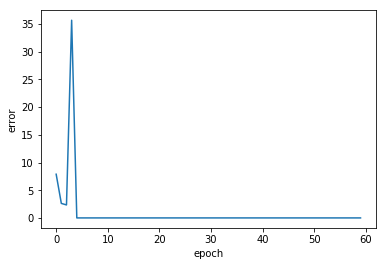

In [27]:
#Visualisations
import matplotlib.pyplot as plt

plt.plot(total_error)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()